## Assignment 4 
Consider a DummyBinaryClassifier that returns a random label in {True, False} for any test input 
that’s fed to it. This classifier does not require any training! Hope, that was already obvious to you. 
Implement this DummyBinaryClassifier as a Python class by extending the BaseEstimator class of 
sklearn, so that you have mandatory methods such as fit(X, y) and predict(X) are implemented.  
As your guess, the fit() method would be a dummy ‘pass’, but the predict() method would 
return True or False randomly.

In [71]:
import numpy as np
from sklearn.base import BaseEstimator

class DummyBinaryClassifier(BaseEstimator):
    def __init__(self, method='bernoulli', p=0.5):
        """
        Initializing the classifier.

        Consider a DummyBinaryClassifier that returns a random label in {True, False} for any test input 
        that’s fed to it. This classifier does not require any training! Hope, that was already obvious to you. 
        Implement this DummyBinaryClassifier as a Python class by extending the BaseEstimator class of 
        sklearn, so that you have mandatory methods such as fit(X, y) and predict(X) are implemented.  
        As your guess, the fit() method would be a dummy ‘pass’, but the predict() method would 
        return True or False randomly. 
        
        """
        self.method = method
        self.p = p

    def fit(self, X, y=None):
        """
        Fit method.As mentioned It's a dummy method here, so it does nothing but to pass.
        """
        pass

    def predict(self, X):
        """
        Predict method, returns True or False based on the chosen method.
        """
        n_samples = len(X)
        
        if self.method == 'bernoulli':
            return np.random.binomial(1, self.p, size=n_samples).astype(bool)
        elif self.method == 'normal':
            return np.random.normal(size=n_samples) > self.p
        elif self.method == 'uniform':
            return np.random.uniform(size=n_samples) > self.p
        else:
            raise ValueError("Method not supported")


## Task 1 
Let’s measure the label distribution (prior probability) of the predictions made by 
DummyBinaryClassifier. As you guessed, the label distribution is dependent on the random 
generator, which typically could be one of {Normal, Bernoulli or Uniform} distributions.  As a part of 
Task 1, you are to implement all the above three generators (using libraries).  You may choose the 
generator type while instantiating the classifier object. Moreover, Bernoulli requires ‘p’ as a 
parameter representing the probability of “True”.  Likewise, the normal and uniform distributions 
require a threshold to convert the discrete samples into Booleans.  You may assume that the 
threshold is in [0,1] range.  Typically, you will instantiate as 
DummyBinaryClassifier(method=’bernoulli’, p=0.5). The expectation is a line-plot with 
the x-axis represent the p in [0,1] in steps of 0.1 and the y-axis representing the Pr(True).  Your plot 
will have 3 such lines representing 3 different random generators.

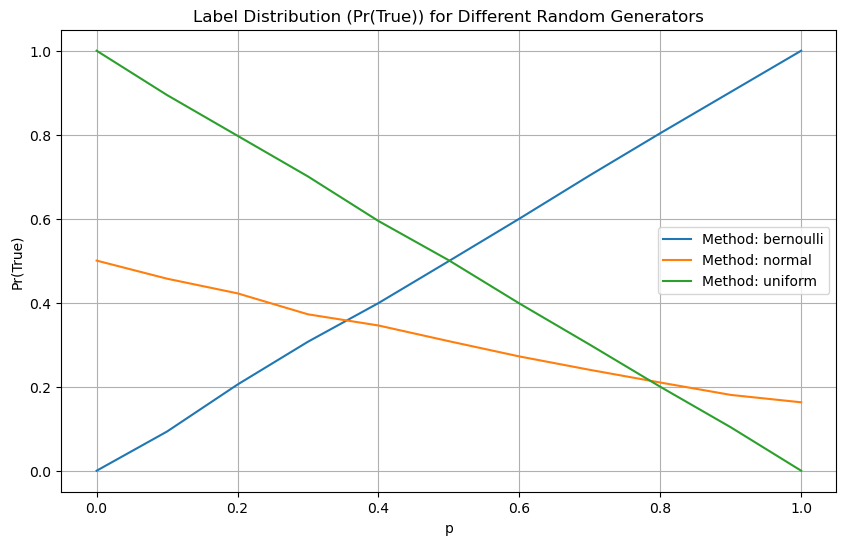

In [3]:
import matplotlib.pyplot as plt

def label_distribution_plot():
    p_values = np.arange(0, 1.1, 0.1)
    generators = ['bernoulli', 'normal', 'uniform']
    
    plt.figure(figsize=(10, 6))
    
    for generator in generators:
        true_probs = []
        for p in p_values:
            classifier = DummyBinaryClassifier(method=generator, p=p)
            preds = classifier.predict(np.ones(10000))  # Generating a large number of predictions
            true_prob = np.mean(preds)
            true_probs.append(true_prob)
        
        plt.plot(p_values, true_probs, label=f'Method: {generator}')
    
    plt.title('Label Distribution (Pr(True)) for Different Random Generators')
    plt.xlabel('p')
    plt.ylabel('Pr(True)')
    plt.legend()
    plt.grid(True)
    plt.show()

label_distribution_plot()


### Observations from above:
1. ##### Bernoulli: As we can see the blue line which increases linearly whith y=x (i.e as p increases the prior increases). So, as you vary p, the fraction of True predictions will increase linearly.  For p = 0, we get no True predictions, and for p = 1, all predictions are True.

2. ##### Normal :  Here Predictions are generated from a normal (Gaussian) distribution, a threshold p is applied. If a randomly generated value exceeds p, the prediction is True, otherwise False. We can observe that the distribution produced more gradual increase due to its bell-curve nature, with fewer True predictions at lower thresholds.

3. ##### Uniform : This generates predictions from a uniform distribution. Similar to the normal distribution, predictions are based on whether the generated value is above or below the threshold p. We can observe this is exactly opposite to Bernoulli (i.e y=-x),which means as the p increases the true predictions will decrease linearly

## TASK 2
Consider the IRIS dataset, but convert the 3-class dataset into a binary class dataset by choosing the 
majority class as say class True and the remaining two classes as class False.  Now, using the 
bernoulli version of the DummyBinaryClassifier, make the prediction of binary IRIS dataset.  

1.Report the label prior of the binary IRIS dataset. 

2.Compute the Precision, Recall, F1 of the prediction at different choice of p-values in [0,1] in 
  steps of 0.1 and plot the P, R, C as line plots. 

3.Using the P & R values, plot PRC. 

4.Using TPR and FPR, plot RoC. 

5.Report the AUPRC and AURoC. 

In [25]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
x
y=iris.target
#The IRIS dataset originally contains 3 classes of flowers (setosa, versicolor, and virginica). converting this into a binary classification problem
print(y)

#the class (setosa) is treated as True (label 1), and the other two classes (versicolor and virginica) are combined and treated as False (label 0).

y_binary=np.where(y==0,1,0).astype(int)
print(y_binary)

## as we can see below we converted the multi class data set into binary classification problem.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


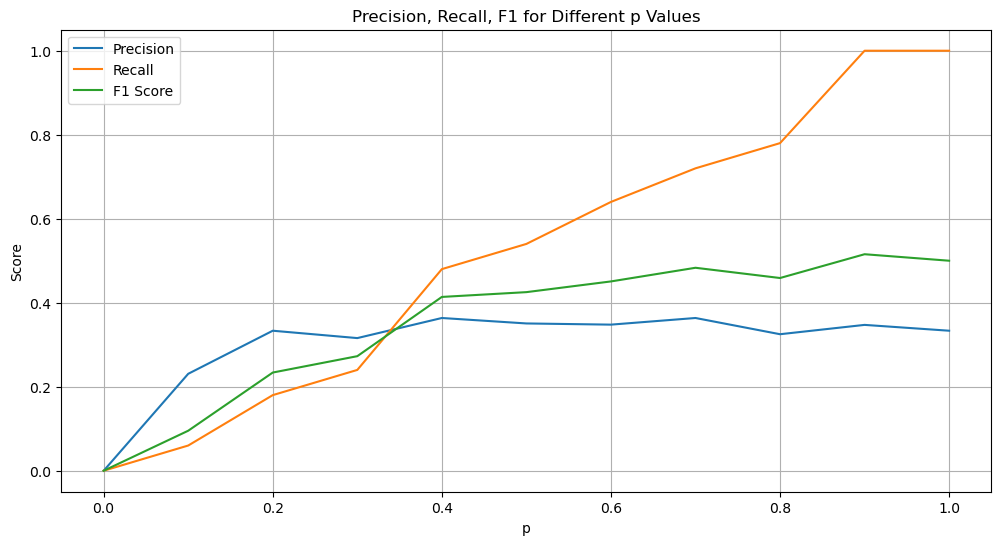

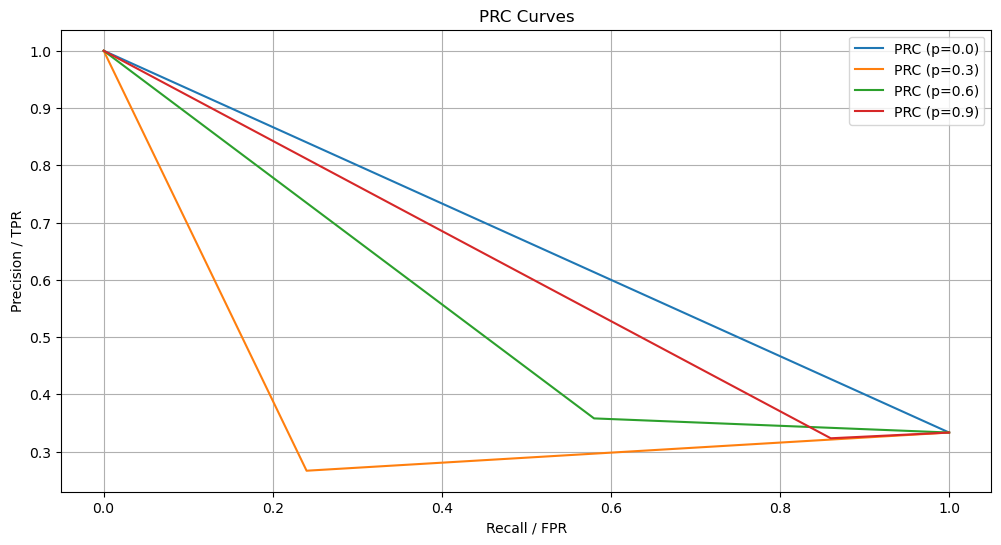

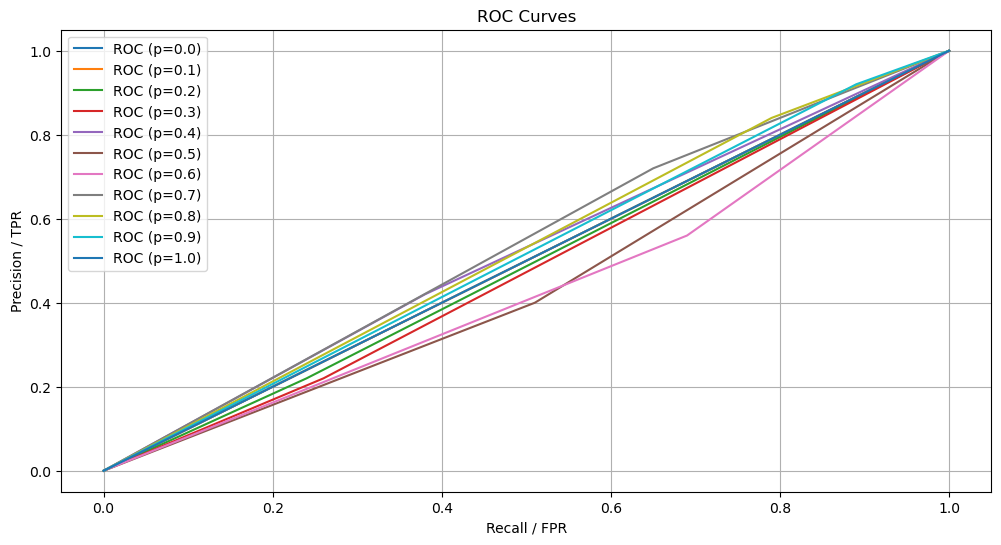

In [33]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc,precision_recall_curve

def evaluate_classifier(p_values): # method using  the Bernoulli version of the DummyBinaryClassifier for evaluating different p values.
    precisions, recalls, f1_scores = [], [], []
    
    for p in p_values:
        classifier = DummyBinaryClassifier(method='bernoulli', p=p) 
        y_pred = classifier.predict(x)
        
        precision = precision_score(y_binary, y_pred)
        recall = recall_score(y_binary, y_pred)
        f1 = f1_score(y_binary, y_pred)
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    return precisions, recalls, f1_scores 
"""
Precision: Measures how many of the predicted True labels are actually True.

Recall: Measures how many of the actual True labels were correctly predicted as True.

F1 Score: The harmonic mean of precision and recall, which balances both metrics
"""
p_values = np.arange(0, 1.1, 0.1)
precisions, recalls, f1_scores = evaluate_classifier(p_values)

# Plotting Precision, Recall, and F1

plt.figure(figsize=(12, 6))
plt.plot(p_values, precisions, label="Precision")
plt.plot(p_values, recalls, label="Recall")
plt.plot(p_values, f1_scores, label="F1 Score")
plt.title("Precision, Recall, F1 for Different p Values")
plt.xlabel("p")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# PRC and ROC Curve
"""
PRC Curve: Precision vs. Recall, which helps visualize the trade-off between precision and recall as p changes.
Area Under Precision-Recall Curve Summarizes the overall performance in terms of precision and recall.

ROC Curve: Plots the True Positive Rate (Recall) vs. the False Positive Rate, helping evaluate the classifier's ability to distinguish between classes.
Area Under ROC Curve Summarizes the overall performance in distinguishing between the two classes.


"""
p_values = np.arange(0, 1.1, 0.3)
def plot_pr_curve():
    plt.figure(figsize=(12, 6))
    for p in p_values:
        classifier = DummyBinaryClassifier(method='bernoulli', p=p)
        y_pred = classifier.predict(x)
        
        # PRC
        precision, recall, _ = precision_recall_curve(y_binary, y_pred)
        plt.plot(recall, precision, label=f'PRC (p={p:.1f})')

    plt.title("PRC Curves")
    plt.xlabel("Recall / FPR")
    plt.ylabel("Precision / TPR")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pr_curve()

p_values = np.arange(0, 1.1, 0.1)
def plot_roc_curve():
    plt.figure(figsize=(12, 6))
    for p in p_values:
        classifier = DummyBinaryClassifier(method='bernoulli', p=p)
        y_pred = classifier.predict(x)
      
        # ROC
        fpr, tpr, _ = roc_curve(y_binary, y_pred)
        plt.plot(fpr, tpr, label=f'ROC (p={p:.1f})')
        
    plt.title("ROC Curves")
    plt.xlabel("Recall / FPR")
    plt.ylabel("Precision / TPR")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve()




## observations of task 2:
1. Precision, Recall, and F1 Score: These metrics will vary based on p. As we can see for very low p (closer to 0), precision is be high because the classifier predicts very few True labels, but recall is be low because it misses many actual True instances. As p increases, recall improves at the cost of precision.

2. PRC Curve: At lower p values, precision is higher, but recall is low. As p increases, recall improves, but precision drops. This curve helps you visualize the trade-off between these metrics.

3. ROC Curve: A better classifier has a curve closer to the top left corner, meaning higher true positive rates (sensitivity) with lower false positive rates.

4. Area under PRC and ROC: These single values give you an overall summary of the classifier's effectiveness across different thresholds. A higher AUPRC and AUROC indicate better classifier performance.

## TASK 3:
Generate the visualization of the decision boundaries induced by DummyBinaryClassifier at 
different values of p in [0, 1] in steps of 0.25 for all the three random generators.

C:\Users\krish\AppData\Local\Temp\ipykernel_3784\292598634.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[1, 2, 2, 1])


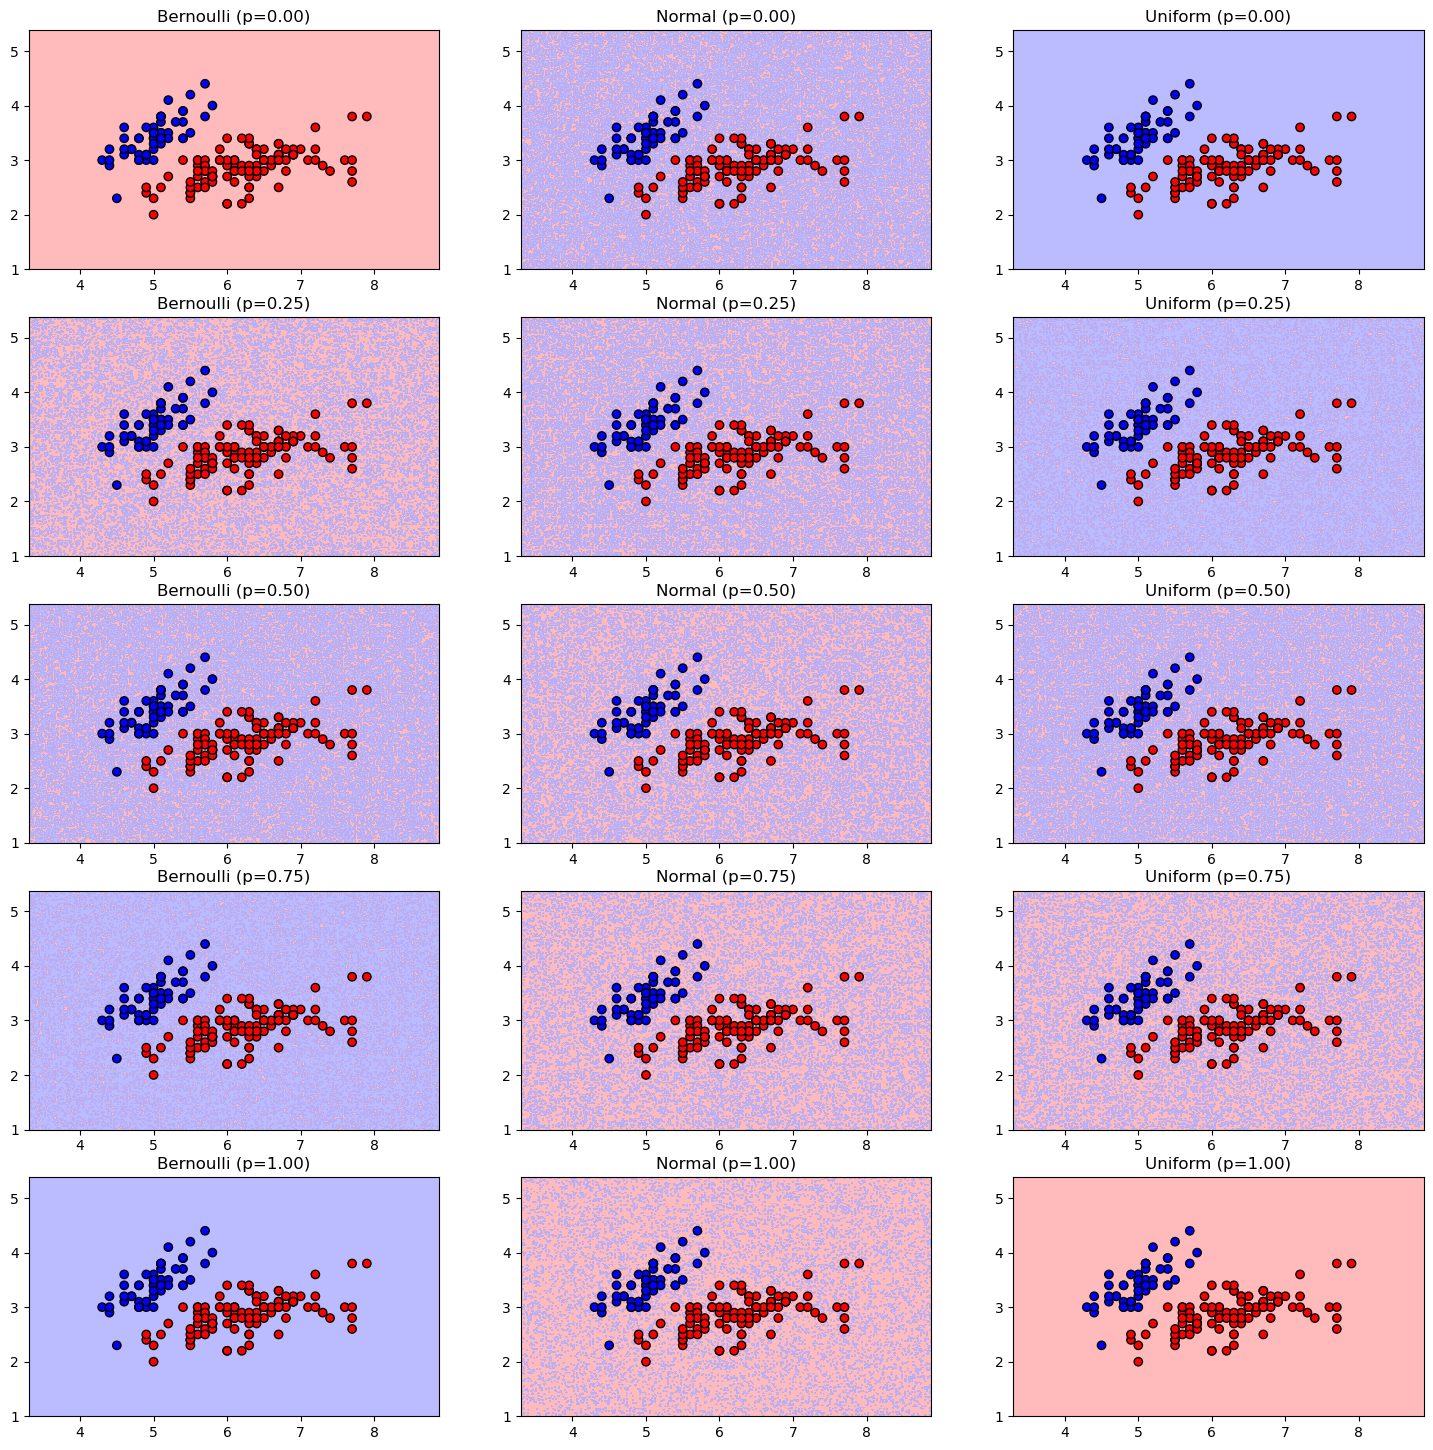

In [70]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(classifier, x, y, ax, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.8)
    # Plot points
    scatter = ax.scatter(x[:, 0], x[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')
    ax.set_title(title)


p_values = np.arange(0, 1.1, 0.25)
methods = ['bernoulli', 'normal', 'uniform']

# Create subplots with len(p_values) rows and len(methods) columns
fig, axes = plt.subplots(len(p_values), len(methods), figsize=(18, 18))

# Iterate over p values and methods
for i, p in enumerate(p_values):
    for j, method in enumerate(methods):
        # Create the classifier for each method
        classifier = DummyBinaryClassifier(method=method, p=p)
        
        # Plot the decision boundary on the respective subplot
        ax = axes[i, j]
        plot_decision_boundary(classifier, x[:, :2], y_binary, ax, title=f"{method.capitalize()} (p={p:.2f})")


plt.tight_layout(rect=[1, 2, 2, 1])
plt.show()


## Observations from above plots:
    1. Bernoulli decision boundaries : For low values of p (like 0.25), the decision boundary favors the False class more strongly, with the red region dominating. This is because the Bernoulli distribution generates more False (0) predictions for lower p.
    As p increases (like 0.50 and 0.75), the balance between True and False becomes more even, with the blue region gradually expanding. At p = 0.75, True labels dominate as the classifier is biased towards predicting True more often.

    2. Normal decision boundaries : The decision boundaries are more scattered compared to Bernoulli. This is because the predictions depend on the continuous normal distribution, and a threshold is applied to convert the output into True or False.
    At p = 0.25, the decision boundary slightly favors False predictions, but True predictions still occur, resulting in a more mixed region.
    As p increases to 0.50 and 0.75, the regions of True predictions become more prominent. However, unlike Bernoulli, the boundaries remain more irregular, as the normal distribution introduces more subtle transitions between True and False regions. 

    3. Uniform decision boundaries : The decision boundary based on the uniform distribution is the most evenly spread compared to the other methods. This is due to the uniform probability of generating values across the entire range.
    At lower p values (0.25), the False region dominates, but the transition between True and False predictions appears more blended than in the Bernoulli case.
    As p increases, the True prediction region becomes larger. At p = 0.75, most of the region is dominated by True predictions, though some False predictions still appear scattered due to the uniform distribution's random nature.